### Test 1 - Split Comparison Test

The test is explained in the README.

This script computes the path lengths for the focal bird in all the UMAPs.

It uses information from kmeans to compute the centroids in the path.

Note: Data paths need to be updated.

In [45]:
# Import packages
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from tqdm import tqdm
import itertools
import glob


In [46]:
def calc_distance(points):
    """ Calculate the euclidean distance between two clusters. """

    total_distance = 0

    for ind in np.arange(1,len(points)):
        curr_distance = distance.euclidean(points[ind-1], points[ind])
        total_distance += curr_distance

    
    return total_distance

In [47]:
def calc_shortest_distance(bird_id, centroids):
    if centroids.shape[0]<2:
        print('Bird ', bird_id, ' has <2 clusters:', centroids.shape[0])
        return 0

    # if centroids.shape[0]>6:
    #     print('Bird ', bird_id, ' has >6 clusters:', centroids.shape[0])
    #     return 0
    
    all_permutations = np.array(list(itertools.permutations(centroids)))
    perm_distances = [calc_distance(permutation) for permutation in all_permutations]
    shortest_distance = np.min(perm_distances)
    return shortest_distance
        

In [48]:
def gather_path_info(bird_id, centroid_df,type='kmeans'):

    if type=='ameans':
        bird_centroids = centroid_df.loc[(centroid_df.bird_id==bird_id)  & (centroid_df.cluster_id<300) , ["centroid_x", "centroid_y"]].values
    elif type=='kmeans':
        bird_centroids = centroid_df.loc[(centroid_df.bird_id==bird_id)  & (centroid_df.cluster_id<300) , ["kcentroid_x", "kcentroid_y"]].values
    else:
        print("Type has to be kmeans/ameans.")

    n_syll = bird_centroids.shape[0]

    path_length = calc_shortest_distance(bird_id, bird_centroids)

    
    return path_length, n_syll

In [49]:
def identify_non_focal_birds(centroid_df, focal_bird):
    centroid_df = centroid_df[centroid_df.cluster_id<300]
    bird_list = np.unique(centroid_df['bird_id'].values)
    bird_list = bird_list.tolist()
    bird_list.remove(focal_bird)
    bird_list = np.array(bird_list, dtype=int)
    bird_list =  np.sort(bird_list)
    print(bird_list.shape)
    return bird_list

In [50]:
# def gather_bird_path_lengths(centroid_df, n_birds, n_iter):
#     bird_ids = np.arange(n_birds)
#     # Find distance between all pairs of clusters
#     for bird_id in bird_ids:
#         dist, n_syll = gather_path_info(bird_id, centroid_df)

        
#         # Store the pairwise distance in the distance matrix
#         distance_matrix[bird_id, n_iter] = dist
#         # distance_matrix[cluster2, cluster1, n_iter] = 0
#         distance_dict['bird_id'].append(bird_id)
#         distance_dict['iteration'].append(n_iter)
#         distance_dict['distance'].append(dist)
#         distance_dict['n_syll'].append(n_syll)


In [51]:
def gather_focal_bird_path_length(centroid_df, focal_bird, split_no):
        dist, n_syll = gather_path_info(focal_bird, centroid_df, type='ameans')
        kdist, n_syll = gather_path_info(focal_bird, centroid_df, type='kmeans')

        non_focal_birds = identify_non_focal_birds(centroid_df, focal_bird)

        
        # Store the pairwise distance in the distance matrix
        distance_matrix[focal_bird, split_no] = kdist
        # distance_matrix[cluster2, cluster1, n_iter] = 0
        distance_dict['focal_bird_id'].append(focal_bird)
        distance_dict['split'].append(split_no)
        distance_dict['distance'].append(dist)
        distance_dict['kdistance'].append(kdist)
        distance_dict['n_syll'].append(n_syll)
        distance_dict['non_focal_birds'].append(non_focal_birds)
        distance_dict['range_0_min'] = centroid_df['range_0_min'].values[0]
        distance_dict['range_1_min'] = centroid_df['range_1_max'].values[0]
        distance_dict['range_0_max'] = centroid_df['range_0_min'].values[0]
        distance_dict['range_1_max'] = centroid_df['range_1_max'].values[0]

In [52]:

data_folder = "/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Main script/Data/"
results_folder ="/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results/"
embeddings_folder = results_folder + '/Embeddings/'
centroids_folder = results_folder + '/KCentroids/'
distances_folder = results_folder + '/KDistances/'


In [53]:
normalise = False
# n_embeddings = 42
n_syllables = 150 # Tutored

In [54]:


# Set the number of iterations and number of clusters expected (= # of digits) 
# n_iterations = n_embeddings #len(rseeds)
n_birds  = 31 #31 Tutored birds
n_splits = 2

# Initialising a matrix to hold all the pairwise distances in each representation
distance_matrix = np.zeros((n_birds, n_splits))
distance_dict = {
    'focal_bird_id': [],
    'split': [],
    'distance': [],
    'kdistance': [],
    'n_syll': [],
    'non_focal_birds': [],
    'range_0_min': [],
    'range_1_min': [],
    'range_0_max': [],
    'range_1_max': []
}

In [55]:
centroid_files = glob.glob(centroids_folder + 'centroids*.csv')


In [56]:
for centroid_file in centroid_files:

    print(centroid_file)

    focal_bird = centroid_file.split('.')[0].split('_')[-2]
    split_no = centroid_file.split('.')[0].split('_')[-1]
    results_filename_tag = '_' + focal_bird + '_' + split_no
    focal_bird = int(focal_bird)
    split_no = int(split_no)




    centroid_df = pd.read_csv(centroid_file) 

    gather_focal_bird_path_length(centroid_df, focal_bird, split_no)



    
 


/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//KCentroids/centroids__24_0.csv
(15,)
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//KCentroids/centroids__28_1.csv
(15,)
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//KCentroids/centroids__18_0.csv
(15,)
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//KCentroids/centroids__30_1.csv
(15,)
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//KCentroids/centroids__29_0.csv
(15,)
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//KCentroids/centroids__17_1.csv
(15,)
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//KCentroids/centroids__8_0.csv
(15,)
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitCompar

In [57]:
centroid_df

,cluster_id,centroid_x,centroid_y,kcentroid_x,kcentroid_y,bird_id,range_0_min,range_1_min,range_0_max,range_1_max
0,300.0,0.000000,0.000000,0.000000,0.000000,0.0,-8.324288,-11.437548,23.689417,21.734108
1,300.0,0.000000,0.000000,0.000000,0.000000,0.0,-8.324288,-11.437548,23.689417,21.734108
2,300.0,0.000000,0.000000,0.000000,0.000000,0.0,-8.324288,-11.437548,23.689417,21.734108
3,300.0,0.000000,0.000000,0.000000,0.000000,0.0,-8.324288,-11.437548,23.689417,21.734108
4,300.0,0.000000,0.000000,0.000000,0.000000,0.0,-8.324288,-11.437548,23.689417,21.734108
...,...,...,...,...,...,...,...,...,...,...
145,145.0,-3.212007,7.317471,-3.296808,7.291216,30.0,-8.324288,-11.437548,23.689417,21.734108
146,146.0,13.778200,8.301038,13.896666,8.341716,30.0,-8.324288,-11.437548,23.689417,21.734108
147,147.0,4.457791,8.160369,4.402268,8.158399,30.0,-8.324288,-11.437548,23.689417,21.734108
148,148.0,1.146489,-0.787608,1.088810,-0.820531,30.0,-8.324288,-11.437548,23.689417,21.734108


In [58]:

# Save the distance matrix in an npy file
np.save(distances_folder +  'path_length_matrix' + '.npy', distance_matrix)

# Store the distance matrix in a csv file
distance_df = pd.DataFrame.from_dict(distance_dict)
distance_df.to_csv(distances_folder + 'path_length_df' + '.csv', index=True)  

In [59]:
distance_df

,focal_bird_id,split,distance,kdistance,n_syll,non_focal_birds,range_0_min,range_1_min,range_0_max,range_1_max
0,24,0,19.816853,23.259403,4,"[0, 3, 9, 10, 11, 13, 15, 16, 17, 18, 20, 21, ...",-8.324288,21.734108,-8.324288,21.734108
1,28,1,32.403883,32.027840,5,"[3, 4, 6, 7, 8, 11, 12, 14, 15, 19, 21, 23, 24...",-8.324288,21.734108,-8.324288,21.734108
2,18,0,34.544478,32.152829,6,"[0, 1, 4, 5, 8, 10, 11, 12, 17, 20, 21, 22, 25...",-8.324288,21.734108,-8.324288,21.734108
3,30,1,43.489948,43.865512,5,"[0, 2, 3, 4, 5, 8, 13, 14, 16, 18, 22, 23, 25,...",-8.324288,21.734108,-8.324288,21.734108
4,29,0,29.835749,31.413554,4,"[1, 2, 4, 6, 7, 10, 13, 16, 17, 18, 19, 23, 26...",-8.324288,21.734108,-8.324288,21.734108
...,...,...,...,...,...,...,...,...,...,...
57,30,0,31.946558,32.057429,5,"[1, 6, 7, 9, 10, 11, 12, 15, 17, 19, 20, 21, 2...",-8.324288,21.734108,-8.324288,21.734108
58,20,0,19.023781,20.092401,4,"[1, 2, 3, 8, 9, 10, 11, 12, 15, 17, 18, 19, 22...",-8.324288,21.734108,-8.324288,21.734108
59,11,1,20.946893,31.861053,5,"[0, 2, 3, 5, 6, 8, 9, 12, 15, 16, 17, 18, 22, ...",-8.324288,21.734108,-8.324288,21.734108
60,1,1,48.746417,52.310988,5,"[0, 2, 3, 5, 9, 10, 11, 12, 18, 19, 20, 21, 24...",-8.324288,21.734108,-8.324288,21.734108


### Analyses

#### Plotting the pairwise distance b/w a given pair across the several iteratiions

In [60]:
n_birds

31

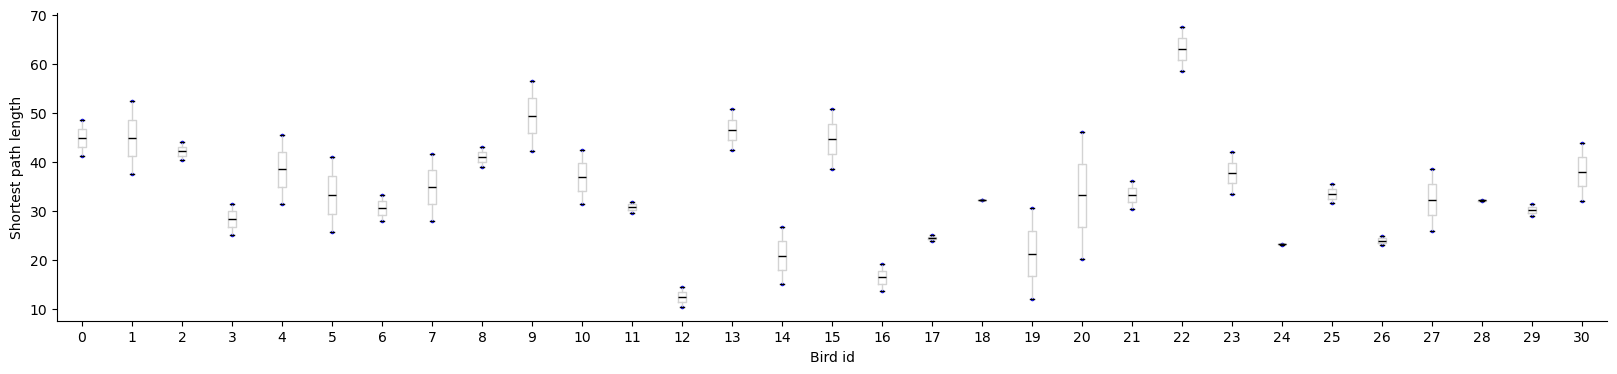

In [61]:
# Plot distances from all iterations for each pair of digit clusters
fig, ax = plt.subplots(1, figsize=(20, 4))
x_ticklabels = []

# Iterating through all pairs of digits
for i in np.arange(n_birds):
            # Make a box plot
            ax.boxplot(distance_matrix[i],
                   patch_artist=False,  # fill with color
                   positions = [i],
                   boxprops=dict(color='lightgrey'),
                   whiskerprops=dict(color='lightgrey'),
                   showfliers = False,
                   medianprops = dict(color='black')
                   ) 
            # Indicate each data point
            ax.scatter(np.zeros((n_splits))+i, distance_matrix[i], s=10, color='blue', marker='.')

            # # Add the x-tick labels
            # tl = str(i) 
            # x_ticklabels.append(tl)

            # Increment the position on the x axis
            # k += 1

# Plot formatting
# ax.set_xticklabels(x_ticklabels, rotation=45);
ax.set_ylabel('Shortest path length')
ax.set_xlabel('Bird id')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)



Fig: The x axis indicates the pair of clusters being tested. The blue point shows the euclidean distance b/w the clusters of the test pair, in one UMAP representation. The box plot describes the distribution of pairwise distances for a given test pair.

In [62]:
# Saving the figure
fig.savefig(distances_folder + 'path_lengths_vs_split.png', bbox_inches='tight')